In [1]:
#Import library
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
#Buat direktori
import os

base_dir = 'C:/Users/akip/Desktop/fix-vgg16/dataset'
# Membuat direktori
os.makedirs(base_dir, exist_ok=True)

# Menampilkan isi dari direktori
print(os.listdir(base_dir))

['data', 'test', 'train', 'validasi']


In [3]:
#menentukan direktorinya
# data_dir = os.path.join(base_dir, 'data')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validasi')
test_dir = os.path.join(base_dir, 'test')

In [4]:
#Direktori isi latih
train_CVPD = os.path.join(train_dir, 'CVPD/')
train_KANKER = os.path.join(train_dir, 'KANKER/')
train_ULATPELIANG = os.path.join(train_dir, 'ULATPELIANG/')
train_SEHAT = os.path.join(train_dir, 'SEHAT/')

#Direktori isi uji
validation_CVPD = os.path.join(validation_dir, 'CVPD/')
validation_KANKER = os.path.join(validation_dir, 'KANKER/')
validation_ULATPELIANG = os.path.join(validation_dir, 'ULATPELIANG/')
validation_SEHAT = os.path.join(validation_dir, 'SEHAT/')

#Direktori isi uji
test_CVPD = os.path.join(test_dir, 'CVPD/')
test_KANKER = os.path.join(test_dir, 'KANKER/')
test_ULATPELIANG = os.path.join(test_dir, 'ULATPELIANG/')
test_SEHAT = os.path.join(test_dir, 'SEHAT/')



In [5]:
print("Jumlah Train CVPD                    = ", len(os.listdir(train_CVPD)))
print("Jumlah Train kankerjeruk             = ", len(os.listdir(train_KANKER)))
print("Jumlah Train ulatpeliang             = ", len(os.listdir(train_ULATPELIANG)))
print("Jumlah Train sehat                   = ", len(os.listdir(train_SEHAT)))

print('=======================================================================================')

print("Jumlah Validation CVPD               = ", len(os.listdir(validation_CVPD)))
print("Jumlah Validation kankerjeruk        = ", len(os.listdir(validation_KANKER)))
print("Jumlah Validation ulatpeliang        = ", len(os.listdir(validation_ULATPELIANG)))
print("Jumlah Validation ulatpeliang        = ", len(os.listdir(validation_SEHAT)))

print('=======================================================================================')

print("Jumlah test CVPD                     = ", len(os.listdir(validation_CVPD)))
print("Jumlah test kankerjeruk              = ", len(os.listdir(validation_KANKER)))
print("Jumlah test ulatpeliang              = ", len(os.listdir(validation_ULATPELIANG)))
print("Jumlah test ulatpeliang              = ", len(os.listdir(validation_SEHAT)))


Jumlah Train CVPD                    =  800
Jumlah Train kankerjeruk             =  800
Jumlah Train ulatpeliang             =  800
Jumlah Train sehat                   =  800
Jumlah Validation CVPD               =  100
Jumlah Validation kankerjeruk        =  100
Jumlah Validation ulatpeliang        =  100
Jumlah Validation ulatpeliang        =  100
Jumlah test CVPD                     =  100
Jumlah test kankerjeruk              =  100
Jumlah test ulatpeliang              =  100
Jumlah test ulatpeliang              =  100


In [6]:
#Download pre-trained model VGG16
vgg = VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling=max,
    classes=1000,
    classifier_activation="softmax",
)
vgg.summary()



Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [7]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [8]:
#Buat parameter sebelumnya tidak dilatih lagi
for layer in vgg.layers:
  layer.trainable = False
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
from tensorflow.keras.layers import Dense

# Mengambil output dari layer sebelum layer prediksi 1000
x = vgg.layers[-2].output

# Membuat layer prediksi baru dengan 4 unit dan nama 'prediction'
predictions = Dense(4, activation='softmax', name='prediksi')(x)

# Membuat model baru
model = Model(inputs=vgg.input, outputs=predictions)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
from keras import optimizers
import tensorflow as tf


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Definisikan metrik F1
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def reset_state(self):
        self.precision.reset_state()
        self.recall.reset_state()

    def result(self):
        precision = self.precision.result()
        recall = self.recall.result()
        return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

# Inisialisasi optimizer menggunakan SGD
sgd = optimizers.SGD()

# Kompilasi model
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=[
                  'accuracy',
                  tf.keras.metrics.Precision(name='precision'),
                  tf.keras.metrics.Recall(name='recall'),
                  F1Score(name='f1_score')
              ])



In [11]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [12]:
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [13]:
train_set = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 3200 images belonging to 4 classes.


In [14]:
val_set = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 400 images belonging to 4 classes.


In [15]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='VGG16Epoch100.h4',
                             verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history = model.fit(
    train_set,
    validation_data=val_set,
    epochs=100,
    steps_per_epoch=len(train_set),
    validation_steps=len(val_set),
    callbacks=callbacks,
    verbose=2)  

duration = datetime.now() - start
print("Waktu Latih : ", duration)


Epoch 1/100



Epoch 1: val_loss improved from inf to 0.44811, saving model to VGG16Epoch100.h4
INFO:tensorflow:Assets written to: VGG16Epoch100.h4\assets


INFO:tensorflow:Assets written to: VGG16Epoch100.h4\assets


100/100 - 197s - loss: 0.5199 - accuracy: 0.4369 - precision: 0.5055 - recall: 0.2603 - f1_score: 0.3436 - val_loss: 0.4481 - val_accuracy: 0.5575 - val_precision: 0.6612 - val_recall: 0.4050 - val_f1_score: 0.5023 - 197s/epoch - 2s/step
Epoch 2/100

Epoch 2: val_loss improved from 0.44811 to 0.42309, saving model to VGG16Epoch100.h4
INFO:tensorflow:Assets written to: VGG16Epoch100.h4\assets


INFO:tensorflow:Assets written to: VGG16Epoch100.h4\assets


100/100 - 188s - loss: 0.4613 - accuracy: 0.5228 - precision: 0.6033 - recall: 0.3925 - f1_score: 0.4756 - val_loss: 0.4231 - val_accuracy: 0.6200 - val_precision: 0.7356 - val_recall: 0.4800 - val_f1_score: 0.5809 - 188s/epoch - 2s/step
Epoch 3/100

Epoch 3: val_loss did not improve from 0.42309
100/100 - 209s - loss: 0.4495 - accuracy: 0.5537 - precision: 0.6260 - recall: 0.4341 - f1_score: 0.5126 - val_loss: 0.4412 - val_accuracy: 0.5750 - val_precision: 0.6192 - val_recall: 0.4675 - val_f1_score: 0.5328 - 209s/epoch - 2s/step
Epoch 4/100

Epoch 4: val_loss improved from 0.42309 to 0.40276, saving model to VGG16Epoch100.h4
INFO:tensorflow:Assets written to: VGG16Epoch100.h4\assets


INFO:tensorflow:Assets written to: VGG16Epoch100.h4\assets


100/100 - 209s - loss: 0.4359 - accuracy: 0.5825 - precision: 0.6511 - recall: 0.4712 - f1_score: 0.5468 - val_loss: 0.4028 - val_accuracy: 0.6200 - val_precision: 0.6976 - val_recall: 0.5075 - val_f1_score: 0.5876 - 209s/epoch - 2s/step
Epoch 5/100

Epoch 5: val_loss did not improve from 0.40276
100/100 - 180s - loss: 0.4287 - accuracy: 0.5906 - precision: 0.6517 - recall: 0.4900 - f1_score: 0.5594 - val_loss: 0.4030 - val_accuracy: 0.6000 - val_precision: 0.6533 - val_recall: 0.5275 - val_f1_score: 0.5837 - 180s/epoch - 2s/step
Epoch 6/100

Epoch 6: val_loss improved from 0.40276 to 0.40111, saving model to VGG16Epoch100.h4
INFO:tensorflow:Assets written to: VGG16Epoch100.h4\assets


INFO:tensorflow:Assets written to: VGG16Epoch100.h4\assets


100/100 - 184s - loss: 0.4147 - accuracy: 0.6003 - precision: 0.6589 - recall: 0.5094 - f1_score: 0.5746 - val_loss: 0.4011 - val_accuracy: 0.6250 - val_precision: 0.7057 - val_recall: 0.5275 - val_f1_score: 0.6037 - 184s/epoch - 2s/step
Epoch 7/100

Epoch 7: val_loss improved from 0.40111 to 0.40002, saving model to VGG16Epoch100.h4
INFO:tensorflow:Assets written to: VGG16Epoch100.h4\assets


INFO:tensorflow:Assets written to: VGG16Epoch100.h4\assets


100/100 - 184s - loss: 0.4205 - accuracy: 0.5928 - precision: 0.6486 - recall: 0.5075 - f1_score: 0.5694 - val_loss: 0.4000 - val_accuracy: 0.6550 - val_precision: 0.7196 - val_recall: 0.5775 - val_f1_score: 0.6408 - 184s/epoch - 2s/step
Epoch 8/100

Epoch 8: val_loss did not improve from 0.40002
100/100 - 180s - loss: 0.4075 - accuracy: 0.6178 - precision: 0.6748 - recall: 0.5344 - f1_score: 0.5964 - val_loss: 0.4141 - val_accuracy: 0.6275 - val_precision: 0.7167 - val_recall: 0.5375 - val_f1_score: 0.6143 - 180s/epoch - 2s/step
Epoch 9/100

Epoch 9: val_loss improved from 0.40002 to 0.37940, saving model to VGG16Epoch100.h4
INFO:tensorflow:Assets written to: VGG16Epoch100.h4\assets


INFO:tensorflow:Assets written to: VGG16Epoch100.h4\assets


100/100 - 183s - loss: 0.4059 - accuracy: 0.6112 - precision: 0.6601 - recall: 0.5256 - f1_score: 0.5852 - val_loss: 0.3794 - val_accuracy: 0.6325 - val_precision: 0.7270 - val_recall: 0.5525 - val_f1_score: 0.6278 - 183s/epoch - 2s/step
Epoch 10/100

Epoch 10: val_loss did not improve from 0.37940
100/100 - 181s - loss: 0.4084 - accuracy: 0.6109 - precision: 0.6754 - recall: 0.5391 - f1_score: 0.5996 - val_loss: 0.4045 - val_accuracy: 0.6150 - val_precision: 0.6667 - val_recall: 0.5500 - val_f1_score: 0.6027 - 181s/epoch - 2s/step
Epoch 11/100

Epoch 11: val_loss did not improve from 0.37940
100/100 - 180s - loss: 0.4018 - accuracy: 0.6313 - precision: 0.6825 - recall: 0.5441 - f1_score: 0.6055 - val_loss: 0.3925 - val_accuracy: 0.6575 - val_precision: 0.7052 - val_recall: 0.5800 - val_f1_score: 0.6365 - 180s/epoch - 2s/step
Epoch 12/100

Epoch 12: val_loss did not improve from 0.37940
100/100 - 185s - loss: 0.4021 - accuracy: 0.6222 - precision: 0.6738 - recall: 0.5428 - f1_score: 0.

INFO:tensorflow:Assets written to: VGG16Epoch100.h4\assets


100/100 - 186s - loss: 0.3938 - accuracy: 0.6416 - precision: 0.6894 - recall: 0.5675 - f1_score: 0.6226 - val_loss: 0.3722 - val_accuracy: 0.6825 - val_precision: 0.7217 - val_recall: 0.5900 - val_f1_score: 0.6492 - 186s/epoch - 2s/step
Epoch 15/100

Epoch 15: val_loss did not improve from 0.37217
100/100 - 181s - loss: 0.3987 - accuracy: 0.6266 - precision: 0.6772 - recall: 0.5512 - f1_score: 0.6078 - val_loss: 0.4094 - val_accuracy: 0.5850 - val_precision: 0.6203 - val_recall: 0.5350 - val_f1_score: 0.5745 - 181s/epoch - 2s/step
Epoch 16/100

Epoch 16: val_loss did not improve from 0.37217
100/100 - 180s - loss: 0.3915 - accuracy: 0.6344 - precision: 0.6801 - recall: 0.5600 - f1_score: 0.6142 - val_loss: 0.3984 - val_accuracy: 0.6175 - val_precision: 0.6728 - val_recall: 0.5500 - val_f1_score: 0.6052 - 180s/epoch - 2s/step
Epoch 17/100

Epoch 17: val_loss did not improve from 0.37217
100/100 - 180s - loss: 0.3888 - accuracy: 0.6438 - precision: 0.6969 - recall: 0.5756 - f1_score: 0.

INFO:tensorflow:Assets written to: VGG16Epoch100.h4\assets


100/100 - 186s - loss: 0.3893 - accuracy: 0.6419 - precision: 0.6965 - recall: 0.5759 - f1_score: 0.6305 - val_loss: 0.3591 - val_accuracy: 0.7000 - val_precision: 0.7464 - val_recall: 0.6400 - val_f1_score: 0.6891 - 186s/epoch - 2s/step
Epoch 21/100

Epoch 21: val_loss did not improve from 0.35906
100/100 - 180s - loss: 0.3823 - accuracy: 0.6409 - precision: 0.6902 - recall: 0.5778 - f1_score: 0.6290 - val_loss: 0.3825 - val_accuracy: 0.6650 - val_precision: 0.7221 - val_recall: 0.5975 - val_f1_score: 0.6539 - 180s/epoch - 2s/step
Epoch 22/100

Epoch 22: val_loss did not improve from 0.35906
100/100 - 180s - loss: 0.3854 - accuracy: 0.6413 - precision: 0.6888 - recall: 0.5763 - f1_score: 0.6275 - val_loss: 0.3953 - val_accuracy: 0.6350 - val_precision: 0.6786 - val_recall: 0.5700 - val_f1_score: 0.6196 - 180s/epoch - 2s/step
Epoch 23/100

Epoch 23: val_loss did not improve from 0.35906
100/100 - 180s - loss: 0.3866 - accuracy: 0.6369 - precision: 0.6899 - recall: 0.5716 - f1_score: 0.

INFO:tensorflow:Assets written to: VGG16Epoch100.h4\assets


100/100 - 184s - loss: 0.3725 - accuracy: 0.6559 - precision: 0.7019 - recall: 0.5991 - f1_score: 0.6464 - val_loss: 0.3589 - val_accuracy: 0.6875 - val_precision: 0.7416 - val_recall: 0.6100 - val_f1_score: 0.6694 - 184s/epoch - 2s/step
Epoch 34/100

Epoch 34: val_loss did not improve from 0.35893
100/100 - 180s - loss: 0.3717 - accuracy: 0.6578 - precision: 0.7066 - recall: 0.5984 - f1_score: 0.6481 - val_loss: 0.3777 - val_accuracy: 0.6475 - val_precision: 0.6827 - val_recall: 0.6025 - val_f1_score: 0.6401 - 180s/epoch - 2s/step
Epoch 35/100

Epoch 35: val_loss did not improve from 0.35893
100/100 - 180s - loss: 0.3702 - accuracy: 0.6628 - precision: 0.7126 - recall: 0.5959 - f1_score: 0.6491 - val_loss: 0.3634 - val_accuracy: 0.6775 - val_precision: 0.7246 - val_recall: 0.6050 - val_f1_score: 0.6594 - 180s/epoch - 2s/step
Epoch 36/100

Epoch 36: val_loss did not improve from 0.35893
100/100 - 180s - loss: 0.3717 - accuracy: 0.6584 - precision: 0.7083 - recall: 0.5950 - f1_score: 0.

INFO:tensorflow:Assets written to: VGG16Epoch100.h4\assets


100/100 - 183s - loss: 0.3692 - accuracy: 0.6616 - precision: 0.7067 - recall: 0.6025 - f1_score: 0.6505 - val_loss: 0.3513 - val_accuracy: 0.6750 - val_precision: 0.7289 - val_recall: 0.6050 - val_f1_score: 0.6612 - 183s/epoch - 2s/step
Epoch 45/100

Epoch 45: val_loss did not improve from 0.35135
100/100 - 180s - loss: 0.3615 - accuracy: 0.6778 - precision: 0.7273 - recall: 0.6175 - f1_score: 0.6679 - val_loss: 0.3849 - val_accuracy: 0.6625 - val_precision: 0.6914 - val_recall: 0.6050 - val_f1_score: 0.6453 - 180s/epoch - 2s/step
Epoch 46/100

Epoch 46: val_loss did not improve from 0.35135
100/100 - 180s - loss: 0.3666 - accuracy: 0.6653 - precision: 0.7123 - recall: 0.6081 - f1_score: 0.6561 - val_loss: 0.3628 - val_accuracy: 0.6675 - val_precision: 0.7321 - val_recall: 0.6150 - val_f1_score: 0.6685 - 180s/epoch - 2s/step
Epoch 47/100

Epoch 47: val_loss did not improve from 0.35135
100/100 - 184s - loss: 0.3630 - accuracy: 0.6672 - precision: 0.7083 - recall: 0.6062 - f1_score: 0.

INFO:tensorflow:Assets written to: VGG16Epoch100.h4\assets


100/100 - 187s - loss: 0.3611 - accuracy: 0.6700 - precision: 0.7125 - recall: 0.6156 - f1_score: 0.6605 - val_loss: 0.3513 - val_accuracy: 0.7025 - val_precision: 0.7565 - val_recall: 0.6525 - val_f1_score: 0.7007 - 187s/epoch - 2s/step
Epoch 55/100

Epoch 55: val_loss did not improve from 0.35134
100/100 - 182s - loss: 0.3621 - accuracy: 0.6716 - precision: 0.7145 - recall: 0.6109 - f1_score: 0.6587 - val_loss: 0.3735 - val_accuracy: 0.6500 - val_precision: 0.7112 - val_recall: 0.5850 - val_f1_score: 0.6420 - 182s/epoch - 2s/step
Epoch 56/100

Epoch 56: val_loss did not improve from 0.35134
100/100 - 181s - loss: 0.3572 - accuracy: 0.6837 - precision: 0.7214 - recall: 0.6288 - f1_score: 0.6719 - val_loss: 0.3568 - val_accuracy: 0.6650 - val_precision: 0.7143 - val_recall: 0.6250 - val_f1_score: 0.6667 - 181s/epoch - 2s/step
Epoch 57/100

Epoch 57: val_loss did not improve from 0.35134
100/100 - 181s - loss: 0.3579 - accuracy: 0.6791 - precision: 0.7195 - recall: 0.6181 - f1_score: 0.

INFO:tensorflow:Assets written to: VGG16Epoch100.h4\assets


100/100 - 184s - loss: 0.3637 - accuracy: 0.6666 - precision: 0.7070 - recall: 0.6131 - f1_score: 0.6567 - val_loss: 0.3442 - val_accuracy: 0.7175 - val_precision: 0.7565 - val_recall: 0.6525 - val_f1_score: 0.7007 - 184s/epoch - 2s/step
Epoch 63/100

Epoch 63: val_loss did not improve from 0.34419
100/100 - 181s - loss: 0.3567 - accuracy: 0.6809 - precision: 0.7221 - recall: 0.6197 - f1_score: 0.6670 - val_loss: 0.3710 - val_accuracy: 0.6875 - val_precision: 0.7096 - val_recall: 0.6475 - val_f1_score: 0.6771 - 181s/epoch - 2s/step
Epoch 64/100

Epoch 64: val_loss did not improve from 0.34419
100/100 - 180s - loss: 0.3565 - accuracy: 0.6781 - precision: 0.7197 - recall: 0.6266 - f1_score: 0.6699 - val_loss: 0.3495 - val_accuracy: 0.7025 - val_precision: 0.7147 - val_recall: 0.6325 - val_f1_score: 0.6711 - 180s/epoch - 2s/step
Epoch 65/100

Epoch 65: val_loss did not improve from 0.34419
100/100 - 180s - loss: 0.3531 - accuracy: 0.6825 - precision: 0.7236 - recall: 0.6275 - f1_score: 0.

INFO:tensorflow:Assets written to: VGG16Epoch100.h4\assets


100/100 - 187s - loss: 0.3514 - accuracy: 0.6759 - precision: 0.7178 - recall: 0.6256 - f1_score: 0.6686 - val_loss: 0.3429 - val_accuracy: 0.7050 - val_precision: 0.7542 - val_recall: 0.6675 - val_f1_score: 0.7082 - 187s/epoch - 2s/step
Epoch 92/100

Epoch 92: val_loss did not improve from 0.34294
100/100 - 181s - loss: 0.3466 - accuracy: 0.6959 - precision: 0.7402 - recall: 0.6438 - f1_score: 0.6886 - val_loss: 0.3636 - val_accuracy: 0.6950 - val_precision: 0.7254 - val_recall: 0.6275 - val_f1_score: 0.6729 - 181s/epoch - 2s/step
Epoch 93/100

Epoch 93: val_loss did not improve from 0.34294
100/100 - 180s - loss: 0.3466 - accuracy: 0.6894 - precision: 0.7337 - recall: 0.6372 - f1_score: 0.6821 - val_loss: 0.3572 - val_accuracy: 0.6750 - val_precision: 0.7225 - val_recall: 0.6250 - val_f1_score: 0.6702 - 180s/epoch - 2s/step
Epoch 94/100

Epoch 94: val_loss did not improve from 0.34294
100/100 - 180s - loss: 0.3539 - accuracy: 0.6794 - precision: 0.7232 - recall: 0.6288 - f1_score: 0.

INFO:tensorflow:Assets written to: VGG16Epoch100.h4\assets


100/100 - 186s - loss: 0.3485 - accuracy: 0.6866 - precision: 0.7245 - recall: 0.6319 - f1_score: 0.6750 - val_loss: 0.3420 - val_accuracy: 0.7275 - val_precision: 0.7479 - val_recall: 0.6525 - val_f1_score: 0.6969 - 186s/epoch - 2s/step
Waktu Latih :  5:03:15.557781


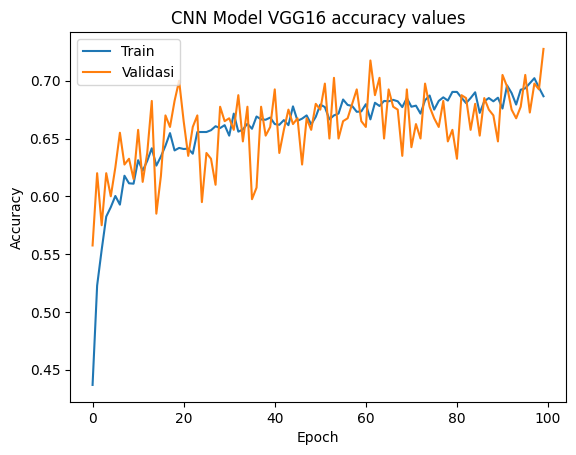

In [16]:
# Plot Akurasi
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model VGG16 accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validasi'], loc='upper left')
plt.show()


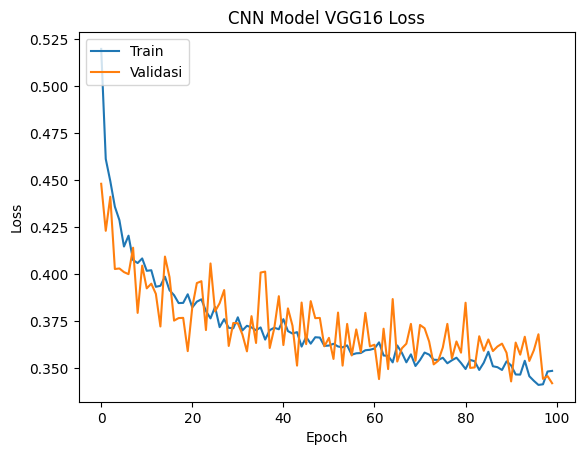

In [17]:
# Plot Loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('CNN Model VGG16 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validasi'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 127ms/step


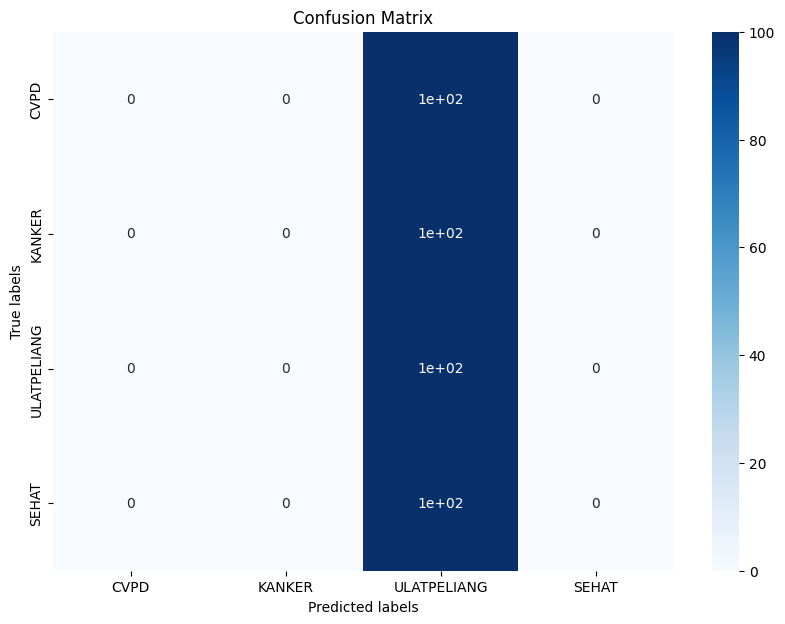

In [18]:
import os
from keras.preprocessing import image
from keras.models import load_model
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the trained model
model_path = "C:/Users/akip/Desktop/fix-vgg16/VGG16Epoch100.h4"
model = load_model(model_path)

# Define the path to your test image folder
test_path = "C:/Users/akip/Desktop/fix-vgg16/dataset/test"

# Define the class list
class_list = ['CVPD', 'KANKER', 'ULATPELIANG', 'SEHAT']

# Initialize lists to store true labels and predictions
y_true = []
y_pred = []

# Loop through all image files in the test folder
for class_name in class_list:
    class_path = os.path.join(test_path, class_name)
    
    if not os.path.exists(class_path):
        print(f"Directory does not exist: {class_path}")
        continue
    
    for filename in os.listdir(class_path):
        try:
            # Construct the complete image path
            img_path = os.path.join(class_path, filename)

            # Load and preprocess the image
            img = image.load_img(img_path, target_size=(224, 224))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = img_array / 255.0

            # Make prediction
            prediction = model.predict(img_array)
            predicted_class = np.argmax(prediction, axis=1)[0]

            # Append the true and predicted labels
            y_true.append(class_list.index(class_name))
            y_pred.append(predicted_class)
        except PermissionError:
            print(f"Error accessing file: {filename}")
            # Optionally, log the error or skip to the next image

# Now that you have all the predictions and true labels, we can calculate the confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', xticklabels=class_list, yticklabels=class_list)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [19]:
from sklearn.metrics import classification_report

# Buat laporan klasifikasi
report = classification_report(y_true, y_pred, target_names=class_list)

print('Classification Report')
print(report)

Classification Report
              precision    recall  f1-score   support

        CVPD       0.00      0.00      0.00       100
      KANKER       0.00      0.00      0.00       100
 ULATPELIANG       0.25      1.00      0.40       100
       SEHAT       0.00      0.00      0.00       100

    accuracy                           0.25       400
   macro avg       0.06      0.25      0.10       400
weighted avg       0.06      0.25      0.10       400



C:\Users\akip\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akip\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akip\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
